- AIM: 
- To determine the excitation current based on load current, as it is the major issue during and after designing the electric machines.
- Specially in sychronous machines it is very delicate and overwheelming issue to maintain high excitation current in AC Sychronous Machines, specially for large purpose industrial usage machines.

In [102]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_table('synchronous machine.csv',sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Iy      557 non-null    object
 1   PF      557 non-null    object
 2   e       557 non-null    object
 3   dIf     557 non-null    object
 4   If      557 non-null    object
dtypes: object(5)
memory usage: 21.9+ KB


In [4]:
df.head()

,Iy,PF,e,dIf,If
0,3,"0,66","0,34","0,383","1,563"
1,3,"0,68","0,32","0,372","1,552"
2,3,"0,7","0,3","0,36","1,54"
3,3,"0,72","0,28","0,338","1,518"
4,3,"0,74","0,26","0,317","1,497"


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
def replacecomma(value):
    value=str(value)
    if',' in value:
        value=value.replace(',','.')
        return float(value)
    else: 
        return float(value)


In [7]:
df['Iy']=df['Iy'].apply(replacecomma)
df['PF']=df['PF'].apply(replacecomma)
df['e']=df['e'].apply(replacecomma)
df['dIf']=df['dIf'].apply(replacecomma)
df['If']=df['If'].apply(replacecomma)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Iy      557 non-null    float64
 1   PF      557 non-null    float64
 2   e       557 non-null    float64
 3   dIf     557 non-null    float64
 4   If      557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB


#terms 
- Iy (Load Current)
- PF (Power factor)
- e (Power factor error)
- dIf (Changing of excitation current of synchronous machine)
- If (Excitation current of synchronous machine)


In [10]:
df=df.rename(columns={'Iy':'Load Current','PF':'Power factor','e':'Power factor error','dIf':'change of excitation current','If':'Excitation Current'}
)

In [13]:
df.head()

,Load Current,Power factor,Power factor error,change of excitation current,Excitation Current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


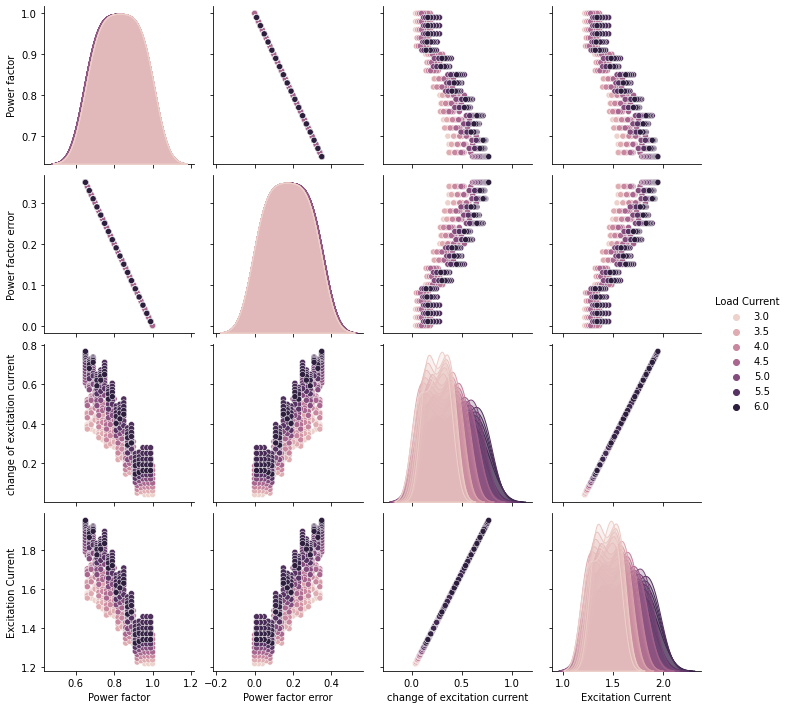

In [17]:
sns.pairplot(df,hue='Load Current')

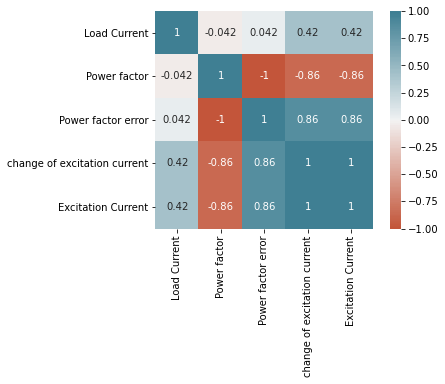

In [18]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)


In [19]:
#correlation proves that load current should be maintained by regulating power factor and excitation current of machine.

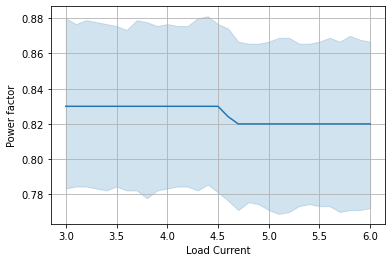

In [20]:
sns.lineplot(data=df,x='Load Current',y='Power factor')
plt.grid()

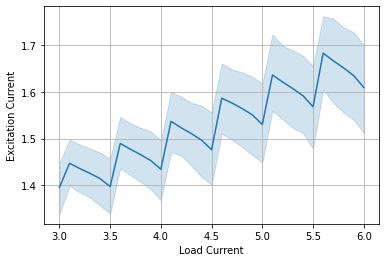

In [21]:
sns.lineplot(data=df,x='Load Current',y='Excitation Current')
plt.grid()

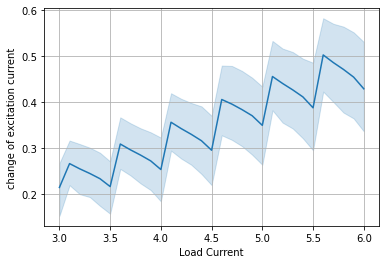

In [22]:
sns.lineplot(data=df,x='Load Current',y='change of excitation current')
plt.grid()

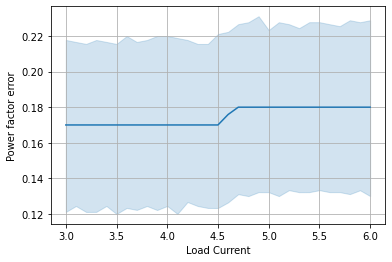

In [23]:
sns.lineplot(data=df,x='Load Current',y='Power factor error')
plt.grid()

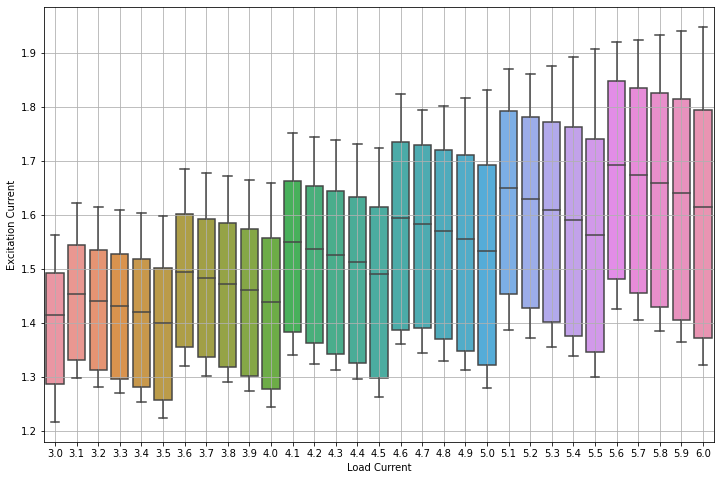

In [27]:
#visualizing outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y="Excitation Current",x="Load Current")
plt.grid(True)

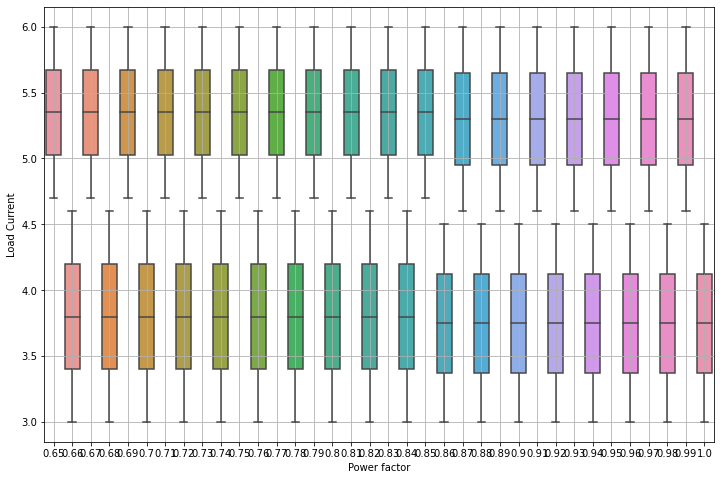

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Power factor",y="Load Current")
plt.grid(True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report,r2_score

In [30]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [109]:
models=[]
models.append(('KNN     -:',KNeighborsRegressor()))
models.append(('linreg  -:',LinearRegression()))
models.append(('SVM     -:',SVR()))
models.append(('DTR     -:',DecisionTreeRegressor()))

accuracy=[]
i=0
for name,model in models:
    model.fit(xtrain,ytrain)
    # Saving model to disk
    pickle.dump(model, open('synch_model.pkl','wb'))
    # Loading model to compare the results
    model = pickle.load(open('synch_model.pkl','rb'))
    ypred=(model.predict(xtest))

    ac=r2_score(ytest,ypred)
    accuracy.append(round(ac*100))
    
    print(name)
    print(f'Accuracy:- {accuracy[i]}')
    print()
    i=i+1



KNN     -:
Accuracy:- 99

linreg  -:
Accuracy:- 100

SVM     -:
Accuracy:- 90

DTR     -:
Accuracy:- 100



In [44]:
from sklearn.model_selection import cross_val_score
print("Name              Accuracy                  STD")
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=10,)
    print(f"{name} {cvs.mean()} {cvs.std()}")

Name              Accuracy                  STD
KNN     -: 0.9240499082891732 0.03812078789442909
linreg  -: 1.0 0.0
SVM     -: 0.8826627119700143 0.027370060944480478
DTR     -: 0.9995559402688136 0.0004648045159172095


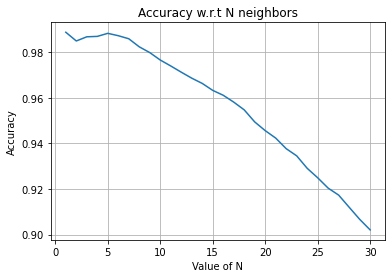

In [50]:
#hypertunning
accuracyi = []

for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    
    ac = r2_score(ytest, ypred)
    accuracyi.append(ac)
    
plt.plot(range(1,31), accuracyi)

plt.title("Accuracy w.r.t N neighbors")
plt.xlabel("Value of N")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [110]:
#best n value is 1

In [74]:
#SVM hypertunning
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["rbf"]}

In [75]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), para, refit=True, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=0, gamma=0.0

[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [76]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [77]:
ypredic=grid.predict(xtest)

In [78]:
print(r2_score(ytest,ypredic))

0.9328912988904933


In [67]:
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["linear"]}

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), para, refit=True, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ....................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ....................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ....................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ....................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=0, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=0, gamma=0.01, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [69]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [70]:
ypredi=grid.predict(xtest)

In [73]:
print(r2_score(ytest,ypredi))

0.9320567720591731


In [81]:
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["poly"]}

In [82]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), para, refit=True, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ......................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ......................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ......................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ......................C=0, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END ....................C=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ...................C=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=0, gamma=0.01

[CV 5/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01, kernel=poly; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END ..............C

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [83]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}

In [84]:
ypredi=grid.predict(xtest)

In [85]:
print(r2_score(ytest,ypredi))

0.9472175991394444


In [97]:
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["sigmoid"]}

In [98]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), para, refit=True, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ................C=0, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ................C=0, gamma=0.01, k

[CV 4/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ............C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ............C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ............C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ............C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ............C=1000, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ...........C=10

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [88]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [89]:
ypredi=grid.predict(xtest)

In [90]:
print(r2_score(ytest,ypredi))

0.9323665210862933


In [91]:
#best model is {'C': 100, 'gamma': 0.1, 'kernel': 'poly'} with 94.7 accuracy.

In [93]:
#rest models are already having high accuracy not need of hypertunning

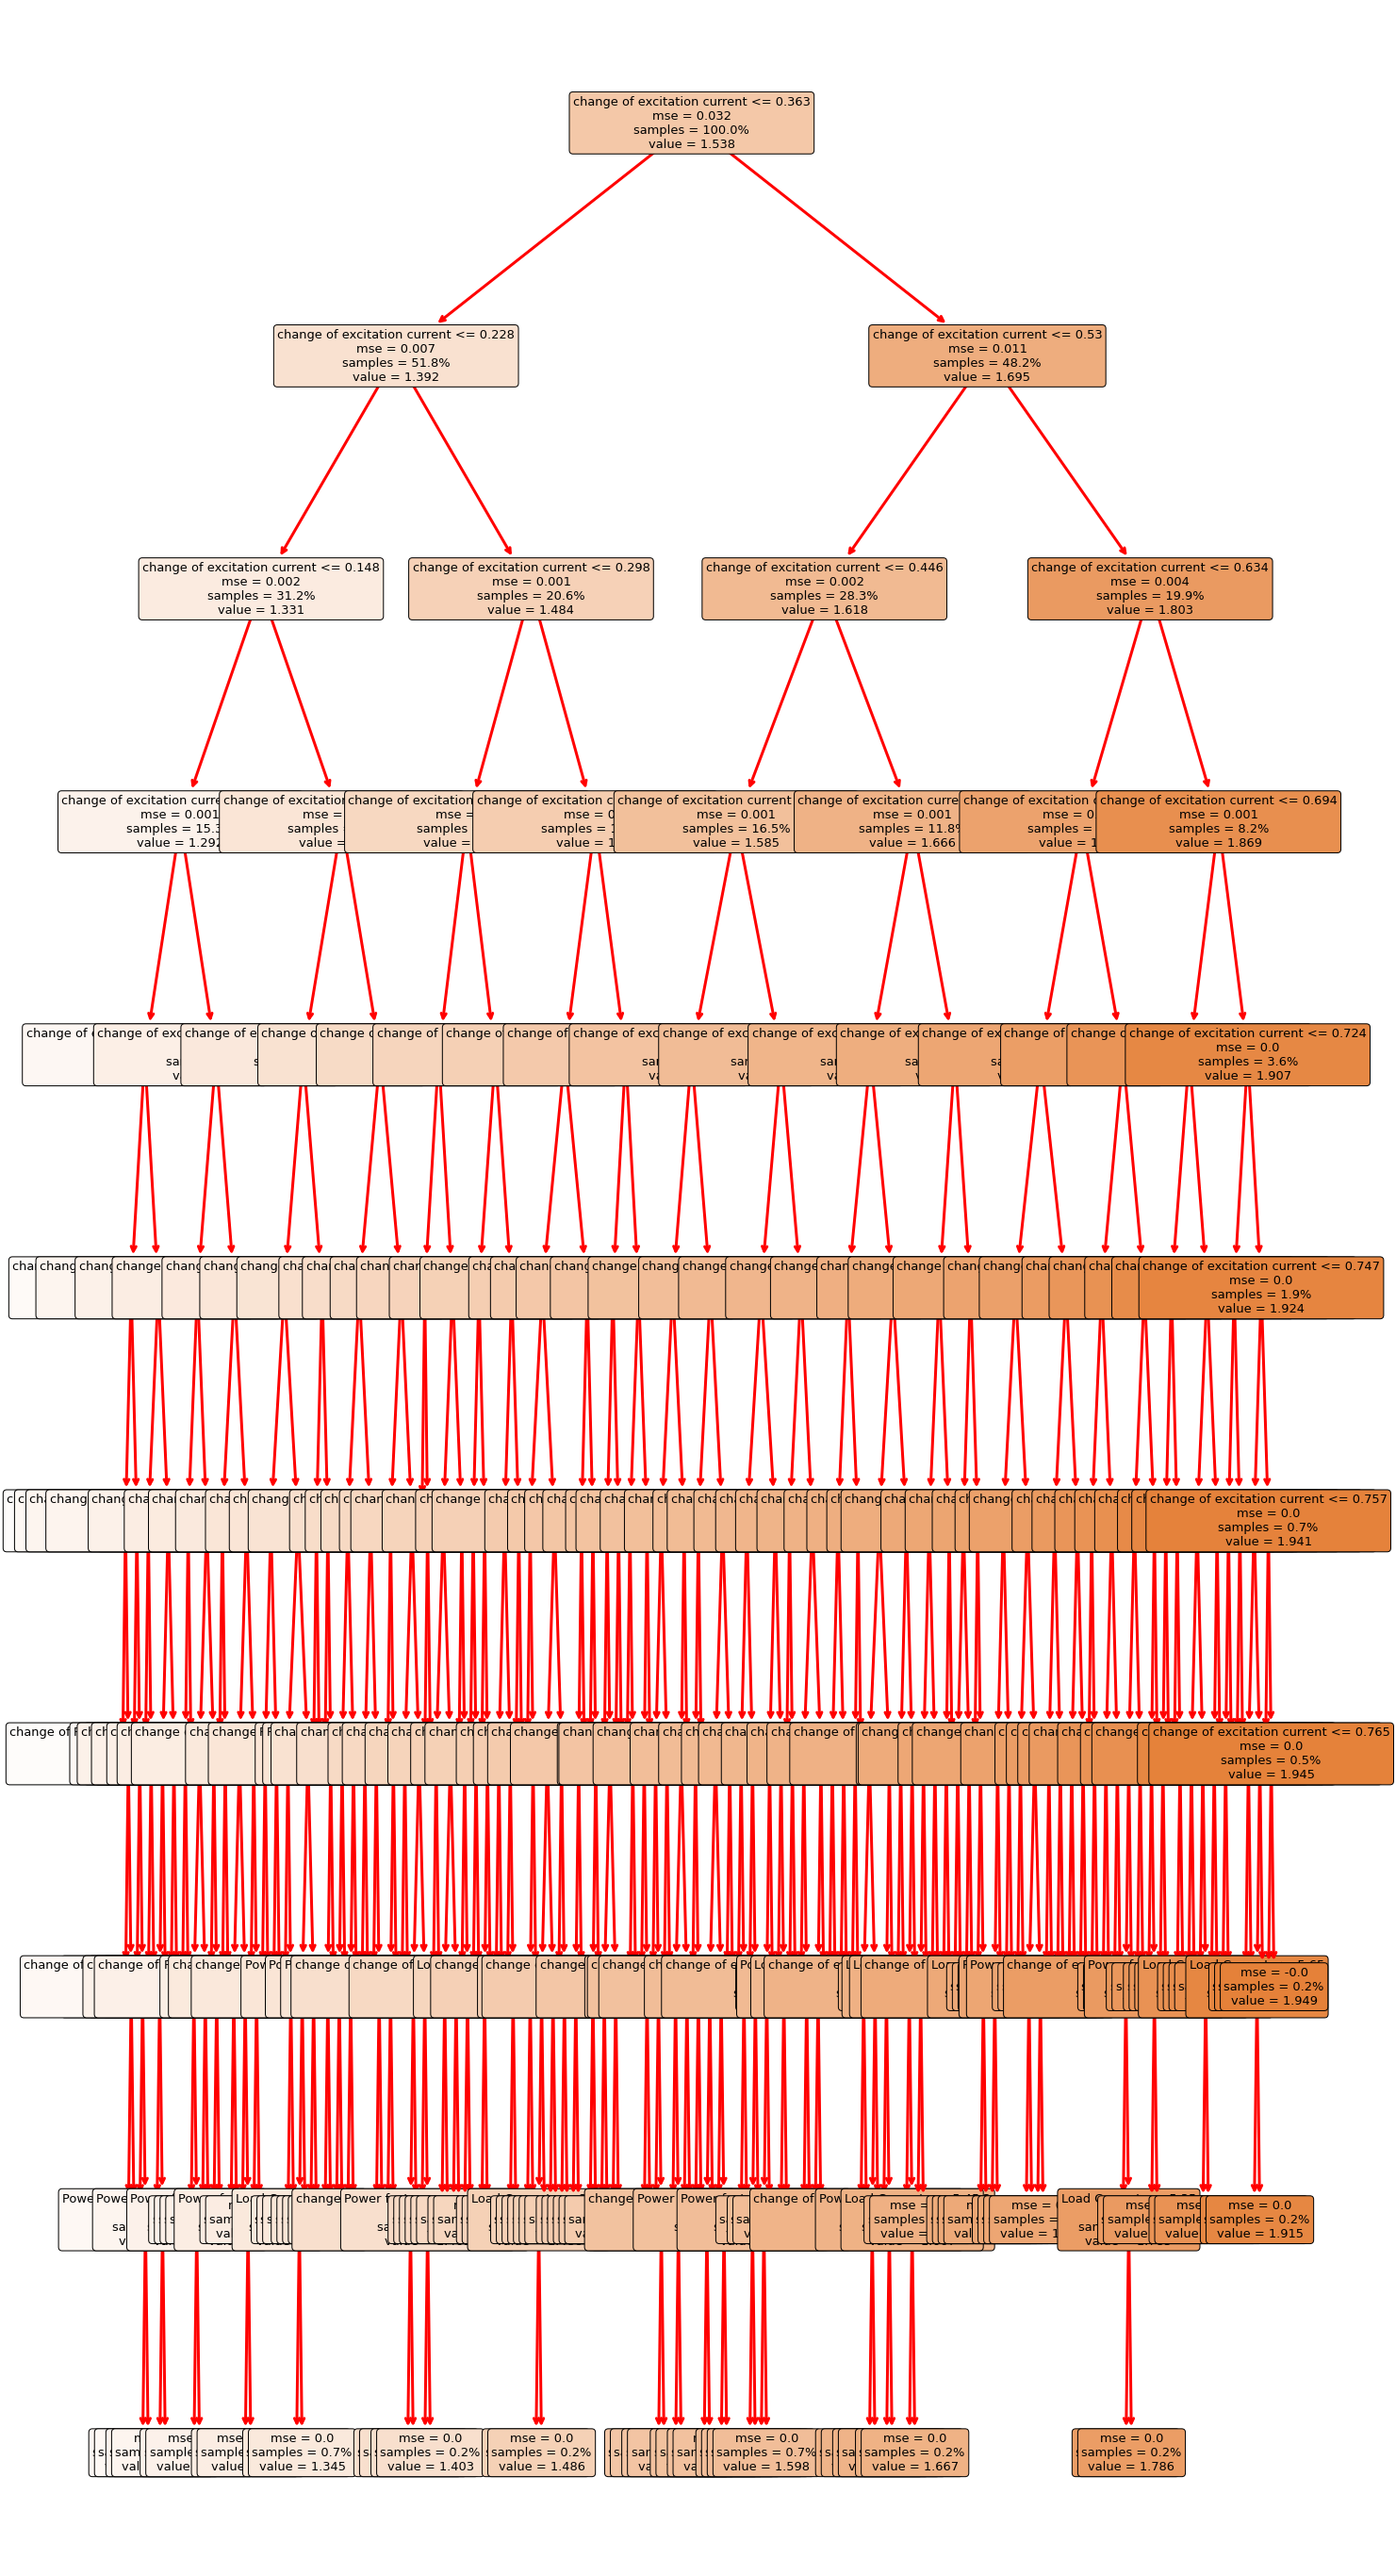

In [100]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

from sklearn import tree
fig, ax = plt.subplots(figsize=(22,50))
chart = tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled="True", proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

# conclusion:
- If the load current of motor is more than excitation current should be incresed linearly as our linear model is operating at 100 percent.we got accuracy of 100 percent hence excitation current is no more issue while designing.
- Power Factor should be unity that is nearly 1 to maintain the system healthy and to supply continous load current.